STQD6324-Assignment 1-P149793

In [1]:
from pyhive import hive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
conn = hive.Connection(host="127.0.0.1",
                       port=10000,
                       username="maria_dev",
                       database="default")
query = "SELECT * FROM alcoholic_beverages_tax_revenue"
df = pd.read_sql(query, conn)
conn.close()
df.head()

,alcoholic_beverages_tax_revenue.period_end_date,alcoholic_beverages_tax_revenue.month,alcoholic_beverages_tax_revenue.calendar_year,alcoholic_beverages_tax_revenue.fiscal_year,alcoholic_beverages_tax_revenue.malt_beverages_barrels,alcoholic_beverages_tax_revenue.malt_beverages_tax_barrels,alcoholic_beverages_tax_revenue.malt_beverages_gallons,alcoholic_beverages_tax_revenue.malt_beverages_tax_gallons,alcoholic_beverages_tax_revenue.malt_beverages_total_tax,alcoholic_beverages_tax_revenue.cider_barrels,...,alcoholic_beverages_tax_revenue.wines_over_21_alcohol_sparkling_wines_tax_gallons,alcoholic_beverages_tax_revenue.wines_total_tax,alcoholic_beverages_tax_revenue.distilled_liquor_gallons,alcoholic_beverages_tax_revenue.distilled_liquor_tax_gallons,alcoholic_beverages_tax_revenue.liquor_cooler_gallons,alcoholic_beverages_tax_revenue.liquor_cooler_tax_gallons,alcoholic_beverages_tax_revenue.alcohol_proof_gallons,alcoholic_beverages_tax_revenue.alcohol_tax_proof_gallons,alcoholic_beverages_tax_revenue.distilled_spirits_total_tax,alcoholic_beverages_tax_revenue.total_tax
0,February 2025,February,2025,FY2025,8919,53514,2455045,491008,544522,193,...,108827,698942,602641,3579694,136552,370057,6205,36858,3986609,5240441
1,January 2025,January,2025,FY2025,9290,55738,2367960,473591,529329,168,...,60450,553288,521553,3098028,128074,347081,6299,37416,3482525,4575839
2,May 2024,May,2024,FY 2024,12714,76285,4202087,840419,916704,211,...,171065,960198,763784,4536884,334335,906045,8048,47806,5490735,7381677
3,April 2024,April,2024,FY 2024,11287,67729,3279914,655985,723714,368,...,117051,783560,666097,3956621,173463,470084,3274,19447,4446152,5966077
4,March 2024,March,2024,FY 2024,12133,72800,2926291,585261,658061,375,...,92615,786920,638567,3793095,144376,391258,3944,23428,4207781,5665646


In [2]:
df.isnull().sum()

alcoholic_beverages_tax_revenue.period_end_date                                      0
alcoholic_beverages_tax_revenue.month                                                0
alcoholic_beverages_tax_revenue.calendar_year                                        0
alcoholic_beverages_tax_revenue.fiscal_year                                          0
alcoholic_beverages_tax_revenue.malt_beverages_barrels                               0
alcoholic_beverages_tax_revenue.malt_beverages_tax_barrels                           0
alcoholic_beverages_tax_revenue.malt_beverages_gallons                               0
alcoholic_beverages_tax_revenue.malt_beverages_tax_gallons                           0
alcoholic_beverages_tax_revenue.malt_beverages_total_tax                             0
alcoholic_beverages_tax_revenue.cider_barrels                                        0
alcoholic_beverages_tax_revenue.cider_tax_barrels                                    0
alcoholic_beverages_tax_revenue.cider_gallo

There are no missing values in the data set.

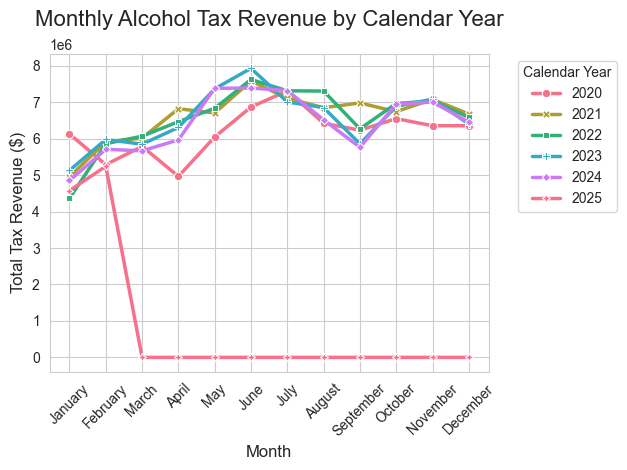

In [3]:
#df['calendar_year'] = df['calendar_year'].astype(str)
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
df['alcoholic_beverages_tax_revenue.month'] = pd.Categorical(df['alcoholic_beverages_tax_revenue.month'], categories=month_order,ordered=True)
month_tax = df.groupby(['alcoholic_beverages_tax_revenue.calendar_year','alcoholic_beverages_tax_revenue.month'])['alcoholic_beverages_tax_revenue.total_tax'].sum().reset_index()
month_tax = month_tax.sort_values(['alcoholic_beverages_tax_revenue.calendar_year','alcoholic_beverages_tax_revenue.month'])
sns.set_style("whitegrid")
sns.lineplot(
    data=month_tax,
    x='alcoholic_beverages_tax_revenue.month',
    y='alcoholic_beverages_tax_revenue.total_tax',
    hue='alcoholic_beverages_tax_revenue.calendar_year',
    style='alcoholic_beverages_tax_revenue.calendar_year',
    markers=True,
    dashes=False,
    palette='husl',
    linewidth=2.5
)
plt.title("Monthly Alcohol Tax Revenue by Calendar Year", fontsize=16, pad=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Tax Revenue ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Calendar Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Alcohol tax revenue in each year shows different monthly fluctuation characteristics, with tax revenue in June 2023 being particularly prominent, reflecting the impact of seasonal or special factors on alcohol tax in different years. Since there is no data from March 2025 onwards in the dataset, the curve for 2025 is followed by zeros.

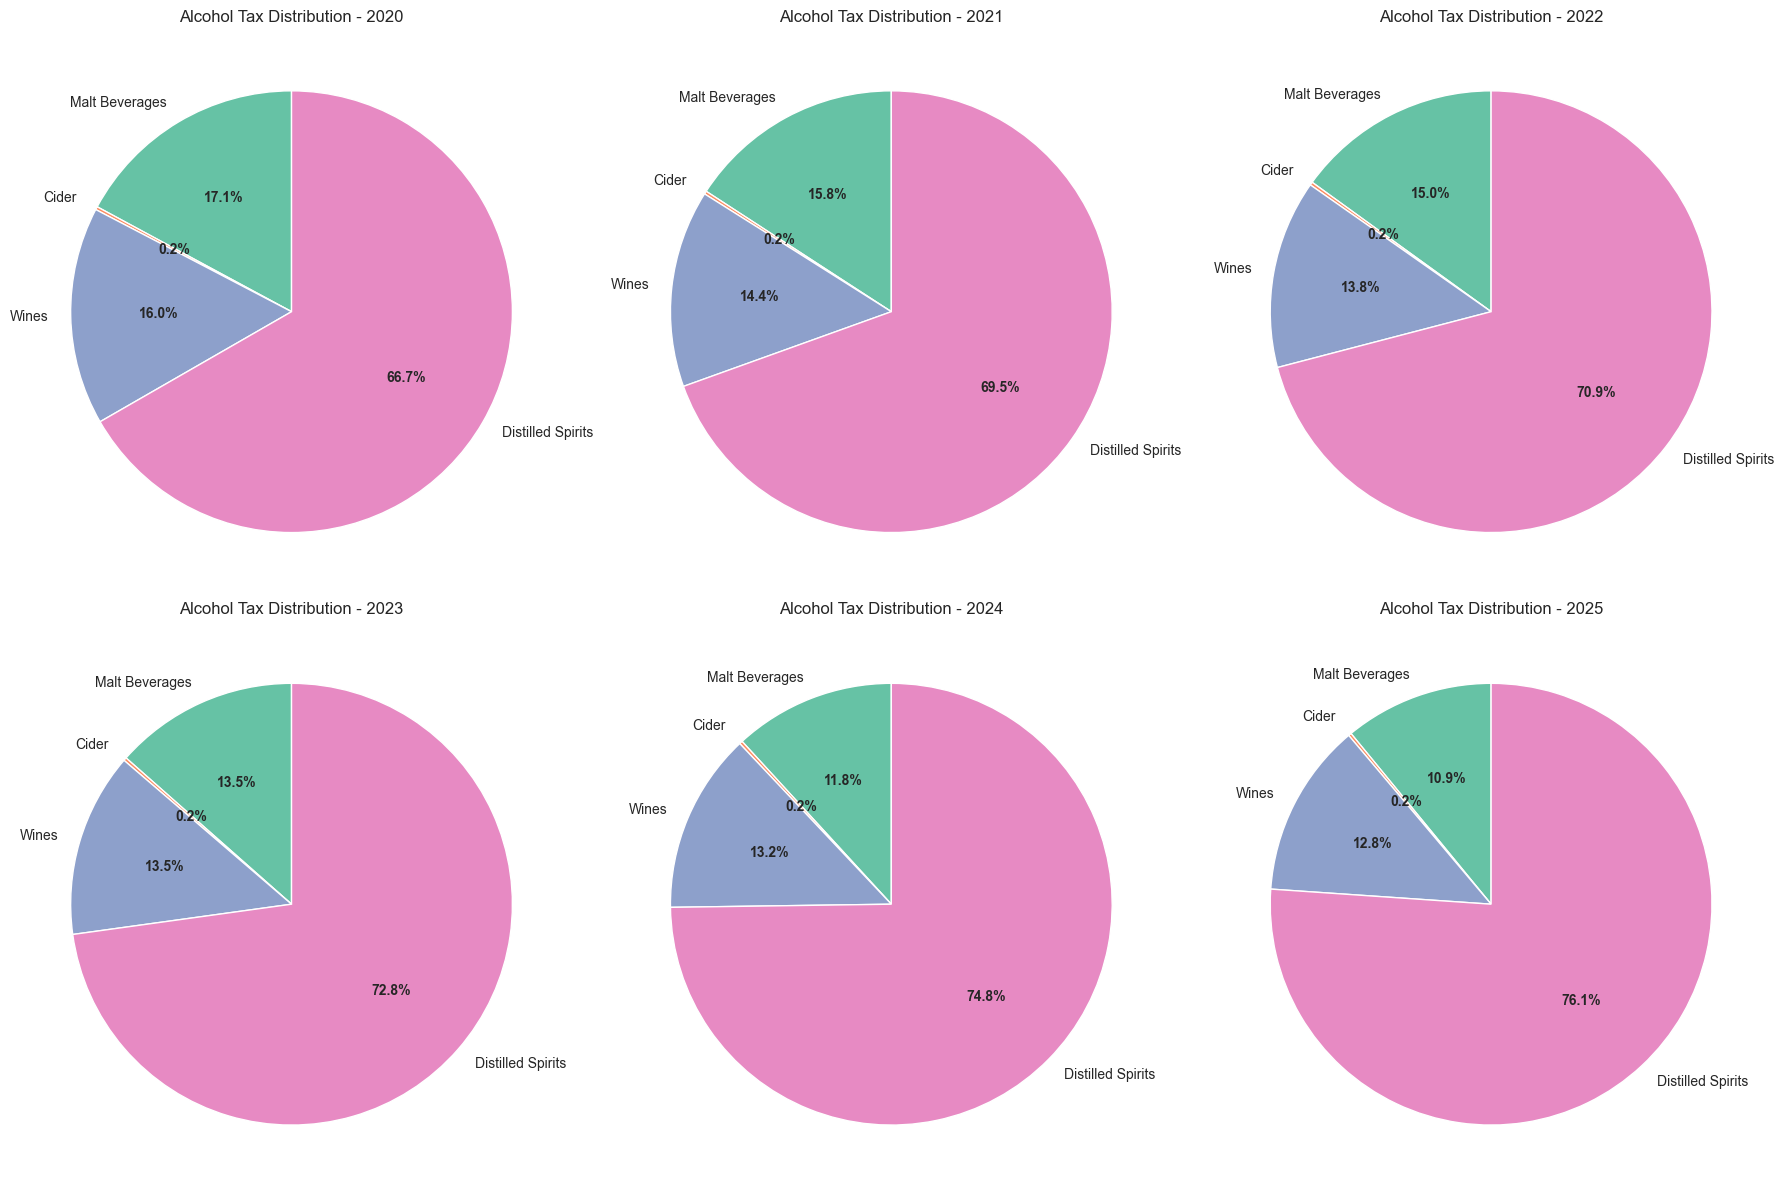

In [4]:
tax_columns = [
    'alcoholic_beverages_tax_revenue.malt_beverages_total_tax',
    'alcoholic_beverages_tax_revenue.cider_total_tax',
    'alcoholic_beverages_tax_revenue.wines_total_tax',
    'alcoholic_beverages_tax_revenue.distilled_spirits_total_tax'
]
year_tax = df.groupby('alcoholic_beverages_tax_revenue.calendar_year')[tax_columns].sum().reset_index()
melted_tax = pd.melt(
    year_tax,
    id_vars=['alcoholic_beverages_tax_revenue.calendar_year'],
    value_vars=['alcoholic_beverages_tax_revenue.malt_beverages_total_tax',
                'alcoholic_beverages_tax_revenue.cider_total_tax',
                'alcoholic_beverages_tax_revenue.wines_total_tax',
                'alcoholic_beverages_tax_revenue.distilled_spirits_total_tax'],
    var_name='alcohol_type',
    value_name='tax'
)
alcohol_labels = {
    'alcoholic_beverages_tax_revenue.malt_beverages_total_tax': 'Malt Beverages',
    'alcoholic_beverages_tax_revenue.cider_total_tax': 'Cider',
    'alcoholic_beverages_tax_revenue.wines_total_tax': 'Wines',
    'alcoholic_beverages_tax_revenue.distilled_spirits_total_tax': 'Distilled Spirits'
}
melted_tax['alcohol_type'] = melted_tax['alcohol_type'].map(alcohol_labels)
colors = {
    'Malt Beverages': '#66c2a5',
    'Cider': '#fc8d62',
    'Wines': '#8da0cb',
    'Distilled Spirits': '#e78ac3'
}
years = melted_tax['alcoholic_beverages_tax_revenue.calendar_year'].unique()
n_years = len(years)
n_cols = 3
n_rows = (n_years + n_cols - 1) // n_cols
plt.figure(figsize=(18, 6 * n_rows))
for i, year in enumerate(years, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    year_data = melted_tax[melted_tax['alcoholic_beverages_tax_revenue.calendar_year'] == year]
    wedges, texts, autotexts = ax.pie(
        year_data['tax'],
        labels=year_data['alcohol_type'],
        colors=[colors[t] for t in year_data['alcohol_type']],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.setp(autotexts, size=10, weight='bold')
    ax.set_title(f"Alcohol Tax Distribution - {year}", fontsize=12, pad=10)
    ax.axis('equal')

plt.tight_layout()
plt.show()

The proportion of distilled spirits in alcohol tax continues to grow, and their dominance becomes more and more prominent; the tax share of malt beverages and wine decreases year by year; the tax contribution of cider is negligible and has remained stable for a long time. This reflects that there are obvious differences in the contribution of different alcoholic beverages to alcohol tax, and the trend changes are significant.

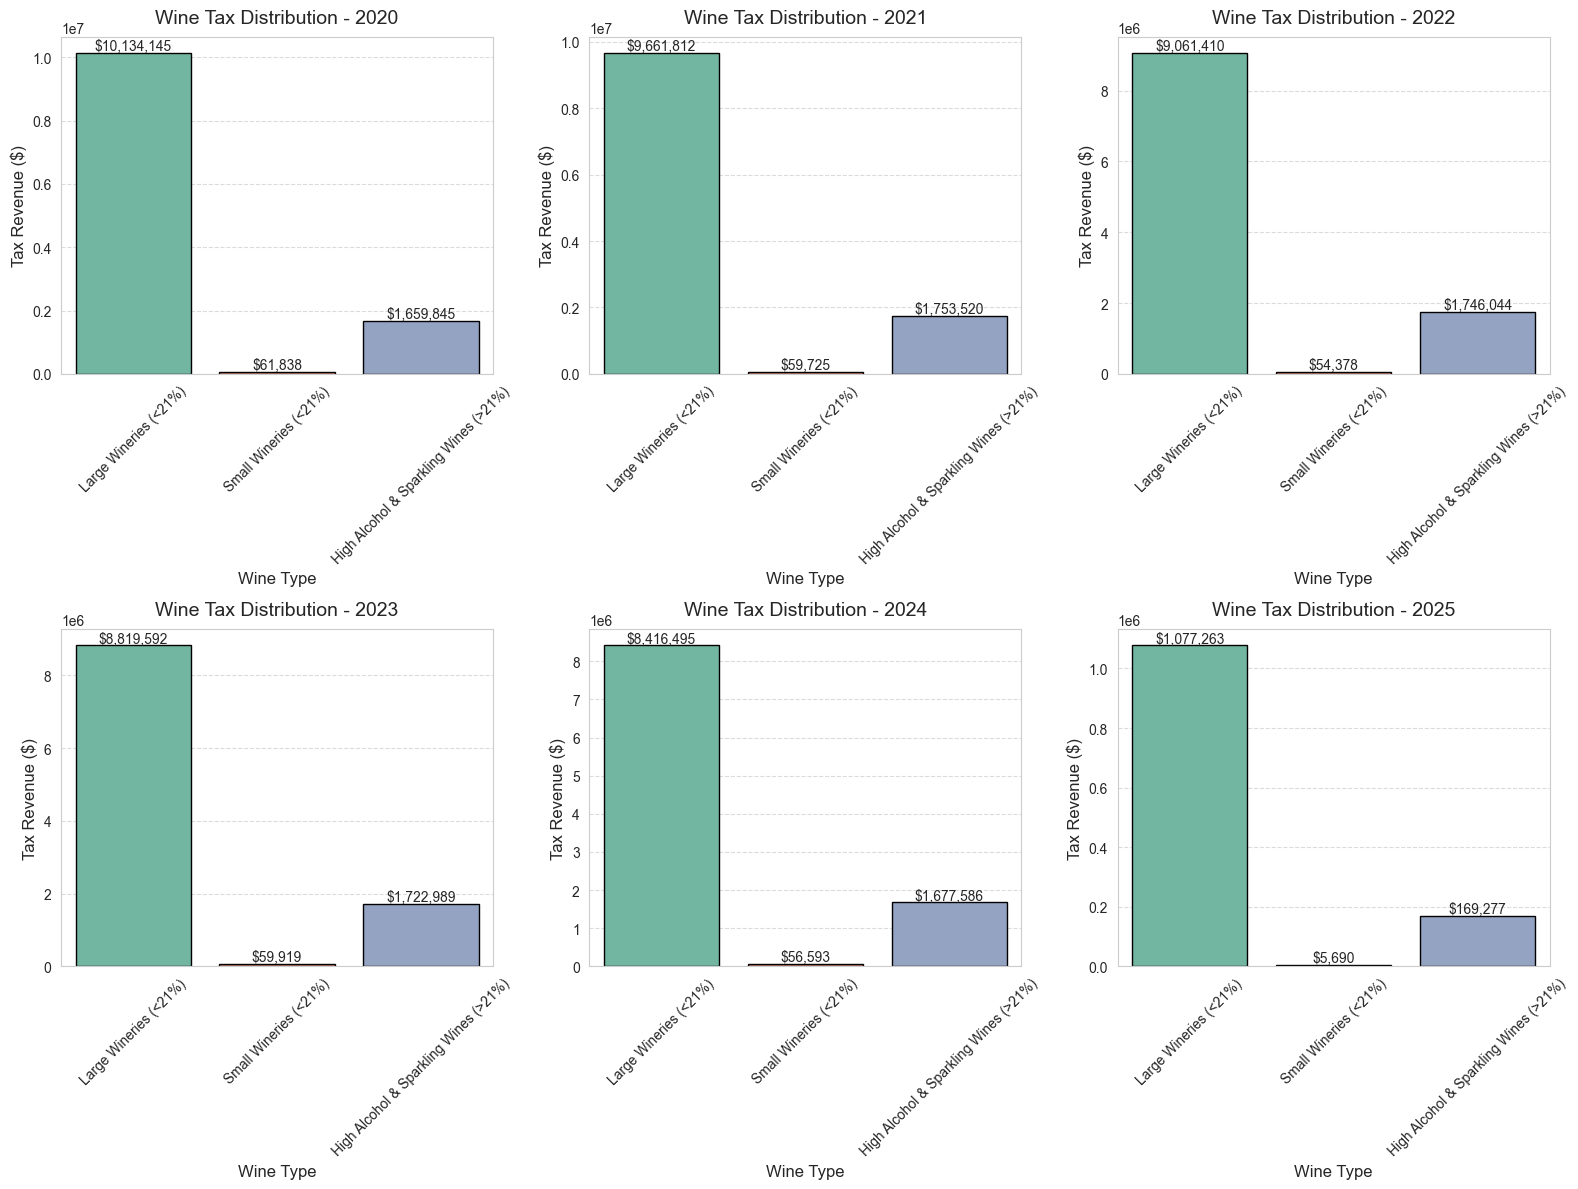

In [5]:
wine_tax_columns = [
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_large_wineries_tax_gallons',
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_small_wineries_tax_gallons',
    'alcoholic_beverages_tax_revenue.wines_over_21_alcohol_sparkling_wines_tax_gallons'
]
year_wine_tax = df.groupby('alcoholic_beverages_tax_revenue.calendar_year')[wine_tax_columns].sum().reset_index()
melted_wine_tax = pd.melt(
    year_wine_tax,
    id_vars=['alcoholic_beverages_tax_revenue.calendar_year'],
    value_vars=[
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_large_wineries_tax_gallons',
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_small_wineries_tax_gallons',
    'alcoholic_beverages_tax_revenue.wines_over_21_alcohol_sparkling_wines_tax_gallons'
    ],
    var_name='wine_type',
    value_name='tax'
)
wine_labels = {
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_large_wineries_tax_gallons': 'Large Wineries (<21%)',
    'alcoholic_beverages_tax_revenue.wines_under_21_alcohol_small_wineries_tax_gallons': 'Small Wineries (<21%)',
    'alcoholic_beverages_tax_revenue.wines_over_21_alcohol_sparkling_wines_tax_gallons': 'High Alcohol & Sparkling Wines (>21%)'
}
melted_wine_tax['wine_type'] = melted_wine_tax['wine_type'].map(wine_labels)
wine_colors = {
    'Large Wineries (<21%)': '#66c2a5',
    'Small Wineries (<21%)': '#fc8d62',
    'High Alcohol & Sparkling Wines (>21%)': '#8da0cb'
}
wine_years = melted_wine_tax['alcoholic_beverages_tax_revenue.calendar_year'].unique()
n_wine_years = len(wine_years)
n_wine_cols = 3
n_wine_rows = (n_wine_years + n_wine_cols - 1) // n_wine_cols
fig, axes = plt.subplots(n_wine_rows, n_wine_cols, figsize=(16, 6 * n_wine_rows))
axes = axes.flatten()
for i, year in enumerate(wine_years):
    ax = axes[i]
    year_wine_data = melted_wine_tax[melted_wine_tax['alcoholic_beverages_tax_revenue.calendar_year'] == year]
    sns.barplot(
        data=year_wine_data,
        x='wine_type',
        y='tax',
        palette=wine_colors,
        ax=ax,
        edgecolor='black',
        linewidth=1
    )
    for p in ax.patches:
        ax.annotate(
            f"${p.get_height():,.0f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10
        )
    ax.set_title(f"Wine Tax Distribution - {year}", fontsize=14, pad=10)
    ax.set_xlabel("Wine Type", fontsize=12)
    ax.set_ylabel("Tax Revenue ($)", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Large wineries are the main source of wine tax, but their revenue is decreasing year by year; taxes on high-alcohol and sparkling wines are also on a downward trend; the tax contribution of small wineries is small and unstable.

23:04:24 - cmdstanpy - INFO - Chain [1] start processing
23:04:25 - cmdstanpy - INFO - Chain [1] done processing


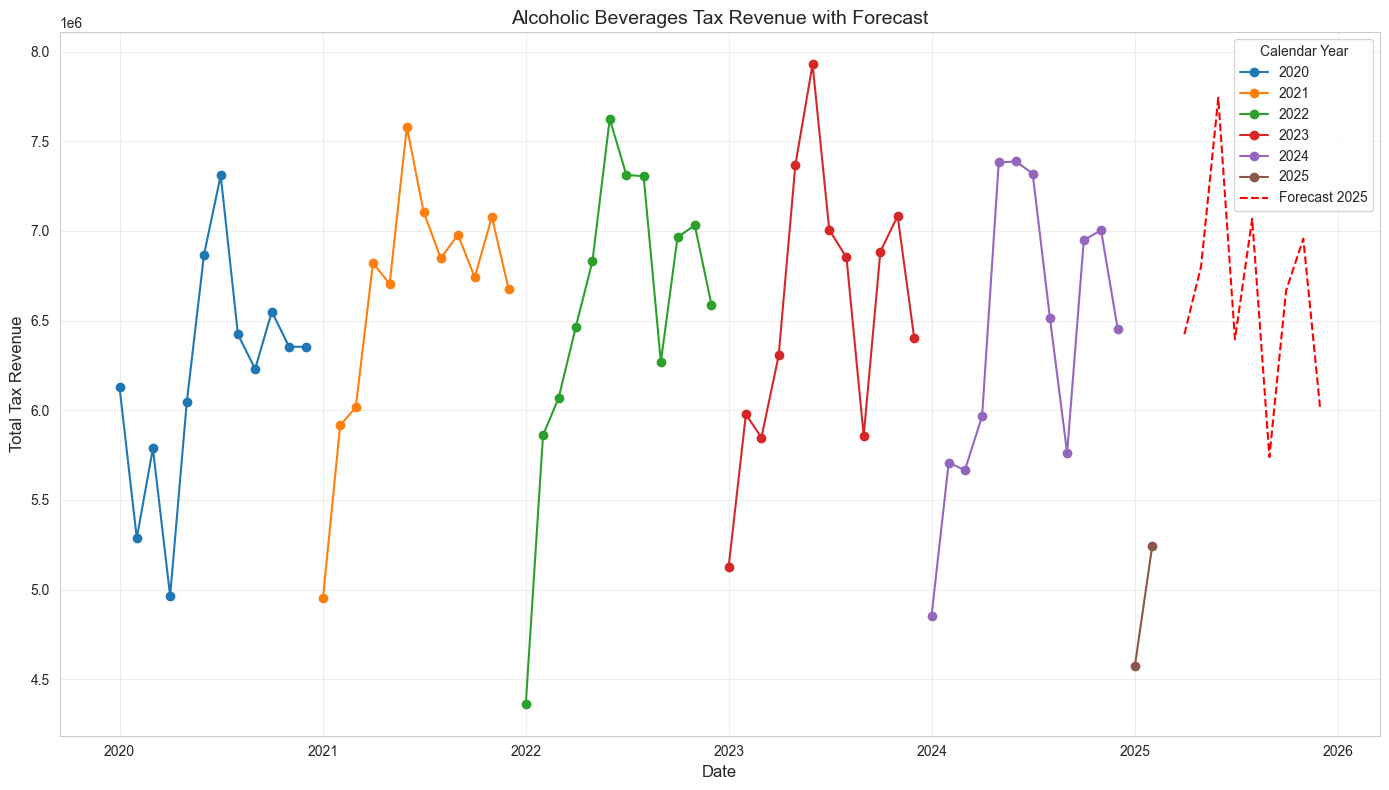

Forecast results from March to December 2025:


,Date,Predicted Total Tax
0,March 2025,"6,423,457"
1,April 2025,"6,801,373"
2,May 2025,"7,742,055"
3,June 2025,"6,395,481"
4,July 2025,"7,067,846"
5,August 2025,"5,738,640"
6,September 2025,"6,666,798"
7,October 2025,"6,956,475"
8,November 2025,"6,019,428"


In [6]:
from prophet import Prophet
import matplotlib.colors as mcolors
df['ds'] = pd.to_datetime(df['alcoholic_beverages_tax_revenue.period_end_date'], format='%B %Y')
df = df.sort_values('ds').reset_index(drop=True)
prophet_df = df[['ds', 'alcoholic_beverages_tax_revenue.total_tax']].rename(
    columns={'alcoholic_beverages_tax_revenue.total_tax': 'y'})
model = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative')
model.fit(prophet_df)
future = model.make_future_dataframe(periods=10, freq='M', include_history=False)
future = future[future['ds'] >= '2025-03-31']
forecast = model.predict(future)
forecast['yhat'] = forecast.yhat.round()
plt.figure(figsize=(14, 8))
ax = plt.gca()
years = sorted(prophet_df.ds.dt.year.unique())
colors = list(mcolors.TABLEAU_COLORS.values())[:len(years)]
for year, color in zip(years, colors):
    mask = (prophet_df.ds.dt.year == year)
    plt.plot(prophet_df[mask].ds, prophet_df[mask].y, 
             label=str(year), color=color, marker='o')
plt.plot(forecast.ds, forecast.yhat, 
         linestyle='--', color='red', label='Forecast 2025')
plt.title('Alcoholic Beverages Tax Revenue with Forecast', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Tax Revenue', fontsize=12)
plt.legend(title='Calendar Year')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("Forecast results from March to December 2025:")
forecast[['ds', 'yhat']].rename(columns={
    'ds': 'Date', 
    'yhat': 'Predicted Total Tax'
}).style.format({
    'Date': lambda x: x.strftime('%B %Y'),
    'Predicted Total Tax': '{:,.0f}'
})

The prophet model is used to predict the total tax revenue from March to December 2025. By analyzing the pictures, it is found that the tax revenue fluctuates greatly and there is no obvious stable trend, indicating that future tax revenue is affected by many uncertain factors and has high volatility and unpredictability.